<a href="https://colab.research.google.com/github/princetyagitech/Computer_Vision/blob/master/Open_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Loading andShowing images

In [ ]:
#Command for showing the image
img=cv2.imread('lion.jpg',cv2.IMREAD_GRAYSCALE)
#IMREAD_GRAYSCALE-0
#IMGREAD_COLOR-1
#IMGREAD_UNCHANGED=-1

In [ ]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

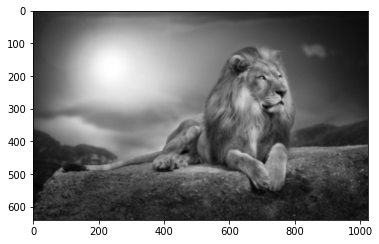

In [ ]:
plt.imshow(img,cmap='gray',interpolation='bicubic')
plt.show()

In [ ]:
cv2.imwrite('liongary.jpg',img)

True

# Loading Video

In [ ]:
# Start capturing using 0 and 1
cap=cv2.VideoCapture(0)# can also 1 fro capturing 2nd webcam
fourcc=cv2.VideoWriter_fourcc(*'XVID')
out=cv2.VideoWriter('output.avi',fourcc,20.0,(640,480))
while True:
    ret,frame=cap.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(gray.shape)
    out.write(frame)
    cv2.imshow('gray',gray)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()


(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)


# drawing on the images and videos using OpenCv

In [ ]:
img=cv2.imread('lion.jpg',cv2.IMREAD_COLOR)
# Drawing the line on the image
cv2.line(img,(0,0),(1500,1500),(255,255,255),15)# for black it would (0,0,0) and white(255,255,255) 15 stands for line width

#Drawing a rectangle
cv2.rectangle(img,(15,25),(200,150),(0,255,0),5)

#circle
cv2.circle(img,(100,100),78,(255,0,0),-1)

#drawing a polygon we need to pass a list of points and it is going to join all the points int the list
pts=np.array([[157,99],[766,97],[335,98],[237,98],[36,12],[100,100]],np.int32)
pts=pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255),2)# true is for connecting the points

# For writing the text on the image
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'Hey!guys I am Lion',(0,130),font,2,(200,78,255),2,cv2.LINE_AA)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image operations

In [ ]:
img=cv2.imread('lion.jpg',cv2.IMREAD_COLOR)

In [ ]:
# Printing Color Value for the pixel
pix=img[55,55]
print(pix)

[95 66 45]


In [ ]:
#actually we can modify the particular pixel using 
img[55,55]=[255,255,255]# specifying color
#Checking
pix=img[55,55]
print(pix)

[255 255 255]


In [ ]:
# ROI-region Of Image It basically Stands for image inside an image
roi=img[300:400,300:400]
# we even can basically convert all the roi in the specific color
#img[300:1500,370:1500]=[255,255,255]
#print(roi)
cv2.imshow('image',roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# We can actually move the roi from one region to another
img[0:100,0:100]=roi
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Arithmetics and Logic

In [ ]:
image1=cv2.imread('lion.jpg',cv2.IMREAD_COLOR)
#image2=cv2.imread('lion.jpg',cv2.IMREAD_COLOR)
image2=cv2.imread('airplane.png',cv2.IMREAD_COLOR)

In [ ]:
image2 = cv2.resize(image2, (1000, 667), interpolation=cv2.INTER_AREA)
image1.shape,image2.shape

((667, 1000, 3), (667, 1000, 3))

In [ ]:
#add=image1+image2 Using this command images will hardly lose their opaqueness
add=cv2.add(image1,image2) # using this image will fit to their best combo

#we can also add images weightedly
add=cv2.addWeighted(image1,0.8,image2,0.2,0)
cv2.imshow('add',add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
rows,cols,channels=image2.shape
roi=image1[0:rows,0:cols]
image2gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

# this operation will basically convert all values above 60 to 255 and below to 0
ret,mask=cv2.threshold(image2gray,60,255,cv2.THRESH_BINARY_INV)

# very similar to the logic operations
mask_inv=cv2.bitwise_not(mask)

image1_bg=cv2.bitwise_and(roi,roi,mask=mask_inv)
image2_fg=cv2.bitwise_and(image2,image2,mask=mask)

dst=cv2.add(image1_bg,image2_fg)
image1[0:rows,0:cols]=dst

cv2.imshow('image1',image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Thresholding
Idea of thresholding is to hold pixels between two values 0 and 1

In [ ]:
retval,threshold=cv2.threshold(image1,100,255,cv2.THRESH_BINARY_INV) # pixel above 12 will be 255 and less than 12 will be 0

# best of these is Gaussion threshold and is adaptive
grayscaled=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
gaus=cv2.adaptiveThreshold(grayscaled,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)

retval2,otsu=cv2.threshold(grayscaled,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('original',image1)
cv2.imshow('threshold',threshold)
cv2.imshow('gaus',gaus)
cv2.imshow('otsu',otsu)

cv2.waitKey(0)
cv2.destroyAllWindows()

# filtering of Images using Open CV


In [ ]:
cap=cv2.VideoCapture(0)
while True:
    _,frame=cap.read()
    #type(frame)
    #frame.shape
    #frame = np.array(frame, dtype=np.uint16)
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    lower_red=np.array([150,150,50]) # first value-hue second-saturation third-val
    upper_red=np.array([180,255,150])
    
    mask=cv2.inRange(hsv,lower_red,upper_red)
    res=cv2.bitwise_and(frame,frame,mask=mask)
    
    #for blurring we need kernel
    kernel=np.ones((15,15),np.float32)/225
    
    smoothed=cv2.filter2D(res,-1,kernel)
    
    #more better type of blur
    blur=cv2.GaussianBlur(res,(15,15),0)
    
    #median blur
    median=cv2.medianBlur(res,15)
    #bilateral
    bilateral=cv2.bilateralFilter(res,15,75,75)
    cv2.imshow('bilateral',bilateral)
    cv2.imshow('smoothed',smoothed)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    cv2.imshow('blur',blur)
    cv2.imshow('median',median)
    k=cv2.waitKey(5) & 0xFF
    if k==27:
        break
        
cv2.destroyAllWindows()
cap.release()

NameError: ignored

# Morphological transformation
It is used to remove the white noises in the background

In [ ]:
cap=cv2.VideoCapture(0)
while True:
    _,frame=cap.read()
    #type(frame)
    #frame.shape
    #frame = np.array(frame, dtype=np.uint16)
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    lower_red=np.array([150,150,50]) # first value-hue second-saturation third-val
    upper_red=np.array([180,255,150])
    
    mask=cv2.inRange(hsv,lower_red,upper_red)
    res=cv2.bitwise_and(frame,frame,mask=mask)
    
    #kernel
    kernel=np.ones((5,5),np.uint8)
    
    erosion=cv2.erode(mask,kernel,iterations=1)
    dilation=cv2.dilate(mask,kernel,iterations=1)
    
    #opening will remove false positives i.e. noises in the background
    opening=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel)
    #closing will remove the false negatives i.e. noises in the object
    closing=cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel)
    
    grayscaled=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #tophat-differnce between original image and the opening image
    tophat=grayscaled-opening
    
    #blak ht-It is the differnce between the original image and closing image
    blackhat=grayscaled-closing
    
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    cv2.imshow('erosion',erosion)
    cv2.imshow('dilation',dilation)
    cv2.imshow('opening',opening)
    cv2.imshow('closing',closing)
    cv2.imshow('tophat',tophat)
    cv2.imshow('blackhat',blackhat)
    k=cv2.waitKey(5) & 0xFF
    if k==27:
        break
        
cv2.destroyAllWindows()
cap.release()

# Edge detection and Gradients

In [ ]:
cap=cv2.VideoCapture(0)
while True:
    _,frame=cap.read()
    
    laplacian=cv2.Laplacian(frame,cv2.CV_64F)
    # detect in the horizontal diection
    sobelx=cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    
    #detect in the vertical direction
    sobely=cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)
    
    # for detect edges 
    canny=cv2.Canny(frame,100,100)
    cv2.imshow('original',frame)
    cv2.imshow('laplacian',laplacian)
    cv2.imshow('sobelx',sobelx)
    cv2.imshow('sobely',sobely)
    cv2.imshow('canny',canny)
    k=cv2.waitKey(5) & 0xFF
    if k==27:
        break
cv2.destroyAllWindows()
cap.release()

# Template Matching

In [ ]:
img_bgr=cv2.imread('template.jpg')
img_gray=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
template=cv2.imread('maintemp.jpg',0)
w,h=template.shape[::-1]
res=cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold=0.73
loc=np.where(res >=threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_bgr, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imshow('Detected',img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

# GrabCut Foreground Extraction

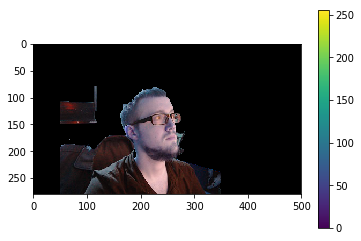

In [ ]:
img=cv2.imread('background.jpg')
mask=np.zeros(img.shape[:2],np.uint8)

bgdmodel=np.zeros((1,65),np.float64)
fgdmodel=np.zeros((1,65),np.float64)

rect=(50,50,300,500)

cv2.grabCut(img,mask,rect,bgdmodel,fgdmodel,5,cv2.GC_INIT_WITH_RECT)
mask2=np.where((mask==2)|(mask==0),0,1).astype('uint8')
img=img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.colorbar()
plt.show()

# Corner Detection

In [ ]:
img=cv2.imread('corner.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=np.float32(gray)

corners=cv2.goodFeaturesToTrack(gray,200,0.01,10)
corners=np.int0(corners)
for corner in corners:
    x,y=corner.ravel()
    cv2.circle(img,(x,y),3,255,-1)
cv2.imshow('corners',img)    
cv2.waitKey(0)
cv2.destroyAllWindows()

# Feature Matching (Homography) Brute Force

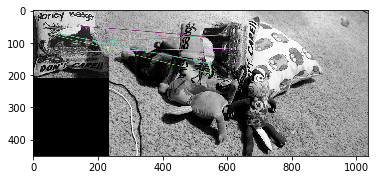

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('opencv-feature-matching-template.jpg',0)
img2 = cv2.imread('opencv-feature-matching-image.jpg',0)
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
plt.imshow(img3)
plt.show()

# MOG Background Reduction 

In [ ]:
cap=cv2.VideoCapture('people-walking.mp4')
fgbg= cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
 
    cv2.imshow('fgmask',frame)
    cv2.imshow('frame',fgmask)

    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    

cap.release()
cv2.destroyAllWindows()

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\highgui\src\window.cpp:356: error: (-215) size.width>0 && size.height>0 in function cv::imshow


# Haar Cascade Object Detection Face & Eye 

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
full_body=cv2.CascadeClassifier('haarcascade_fullbody.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cap = cv2.VideoCapture(0)
while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = full_body.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

# Gathering Images 

In [ ]:
import urllib.request
import os

In [ ]:
def store_raw_images(link):
    neg_images_link = link   
    neg_image_urls = urllib.request.urlopen(neg_images_link).read().decode()
    pic_num = 1
    
    if not os.path.exists('neg'):# neg is name of folder
        os.makedirs('neg')
        
    for i in neg_image_urls.split('\n'):
        try:
            print(i)
            urllib.request.urlretrieve(i, "neg/"+str(pic_num)+".jpg")
            img = cv2.imread("neg/"+str(pic_num)+".jpg",cv2.IMREAD_GRAYSCALE)
            # should be larger than samples / pos pic (so we can place our image on it)
            resized_image = cv2.resize(img, (100, 100))
            cv2.imwrite("neg/"+str(pic_num)+".jpg",resized_image)
            pic_num += 1
            
        except Exception as e:
            print(str(e))  

# sketch of a image

In [ ]:
import cv2
 
img_gray = cv2.imread("image1.jpeg",cv2.IMREAD_GRAYSCALE)
#img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
img_gray_inv = 255 - img_gray
img_blur = cv2.GaussianBlur(img_gray_inv, ksize=(21, 21),sigmaX=0, sigmaY=0)

In [ ]:
def dodgeV2(image, mask):
    return cv2.divide(image, 255-mask, scale=256)

In [ ]:
img_blend = dodgeV2(img_gray, img_blur)
cv2.imshow("pencil sketch", img_blend)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.imwrite("pencilsketch.jpg",img_blend)

True

In [ ]:
import cv2 as cv

In [ ]:
import numpy as np
class ImageDenoising:
    '''OpenCV provides variations of this technique.
        -'MD'-cv.fastNlMeansDenoising() - works with a single grayscale images
        -'MDC'-cv.fastNlMeansDenoisingColored() - works with a color image.
        -'MDM'-cv.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
        -'MDCM'-cv.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.
        
        default variation used:
        '''

    def _init__():
        self.variation='MD'
        self.src=src
        self.dst=dst
        self.templateWindowSize=templateWindowSize
        self.searchWindowSize=searchWindowSize
        self.h=h
        self.temporalWindowSize=temporalWindowSize
        self.normType=normType
        self.imgToDenoiseIndex=imgToDenoiseIndex
        
    def denoising(self,path,dst=None,templateWindowSize=7,searchWindowSize=21,h=3,temporalWindowSize=3,normType='NORM_L2',imgToDenoiseIndex=2):
        self.variation='MD'
        self.dst=dst
        self.templateWindowSize=templateWindowSize
        self.searchWindowSize=searchWindowSize
        self.h=h
        self.temporalWindowSize=temporalWindowSize
        self.normType=normType
        self.imgToDenoiseIndex=imgToDenoiseIndex
        self.src=cv.imread(path)
        
        ''' Common-arguments-
            src-Input 8-bit 1-channel, 2-channel, 3-channel or 4-channel image.
            dst-Output image with the same size and type as src .
            hForColorComponents : same as h, but for color images only. (normally same as h) 
            templateWindowSize-Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
            searchWindowSize-Size in pixels of the window that is used to compute weighted average for given pixel. 
                            Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels
            h-Parameter regulating filter strength. Big h value perfectly removes noise but also removes image details, smaller h value preserves details 
                            but also preserves some noise'''
        if self.variation is 'MD': #works with a single grayscale images
            return cv.fastNlMeansDenoising(self.src,self.dst,self.templateWindowSize,self.searchWindowSize,self.h) 
        elif self.variation is 'MDC':
            self.hForColorComponents=self.h
            return cv.fastNlMeansDenoisingColored(self.src,self.dst,self.templateWindowSize,self.hForColorComponents,self.searchWindowSize,self.h)
        elif self.variation is 'MDM':
            '''Additional Parameters 
                imgToDenoiseIndex-Target image to denoise index in srcImgs sequence
                temporalWindowSize	Number of surrounding images to use for target image denoising. Should be odd.
                                    Images from imgToDenoiseIndex - temporalWindowSize / 2 to imgToDenoiseIndex - temporalWindowSize / 2 from srcImgs will be used to denoise srcImgs[imgToDenoiseIndex] image.
                normType	Type of norm used for weight calculation. Can be either NORM_L2 or NORM_L1
               '''
            return cv.fastNlMeansDenoisingMulti(self.src,self.dst,self.imgToDenoiseIndex,self.templateWindowSize,self.temporalWindowSize,self.searchWindowSize,self.h,normType)
        elif self.variation is 'MDCM':
            return cv.fastNlMeansDenoisingColoredMulti(src,imgToDenoiseIndex,temporalWindowSize,templateWindowSize,dst,hForColorComponents,searchWindowSize,h)

        

In [ ]:
c=ImageDenoising('MDC','/content/shivani_photo-min.jpeg',templateWindowSize=7,searchWindowSize=21,h=3,temporalWindowSize=3,normType='NORM_L2',imgToDenoiseIndex=2)

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt
img=cv.imread('airplane.png')


In [ ]:
idn=ImageDenoising('MDC','airplane.png')

In [ ]:
idn.denoising()

array([[[215, 131,  24],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [215, 131,  24],
        [215, 215, 215]],

       [[215, 131,  24],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [215, 131,  24],
        [215, 215, 215]],

       [[215, 131,  24],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [215, 131,  24],
        [213, 213, 213]],

       ...,

       [[215, 131,  24],
        [125, 125, 125],
        [ 34,  48, 120],
        ...,
        [  0,   6,   5],
        [215, 131,  24],
        [206, 206, 206]],

       [[215, 131,  24],
        [124, 124, 124],
        [ 43,  54, 124],
        ...,
        [  3,  10,   9],
        [215, 131,  24],
        [208, 208, 208]],

       [[215, 131,  24],
        [220, 134,  26],
        [190, 114,  16],
        ...,
        [215, 131,  24],
        [215, 131,  24],
        [213, 213, 213]]

In [ ]:
import numpy as np
converted_img = [np.uint8(img)]
cv.fastNlMeansDenoisingColoredMulti(img,imgToDenoiseIndex=2,temporalWindowSize=3,templateWindowSize=7,dst=None,searchWindowSize=21,h=7)

error: ignored

In [ ]:
#Idea of thresholding is to hold pixels between two values 0 and 1
import cv2 as cv
'''type:binary,binaryinv,threstrunc,threshtozero,threstozeroinv,adaptivethreshmeanc,adaptivethreshgaussian
Simple Thesholding:
    cv.THRESH_BINARY
    cv.THRESH_BINARY_INV
    cv.THRESH_TRUNC
    cv.THRESH_TOZERO
    cv.THRESH_TOZERO_INV
Adaptive Thresholding:
    cv.ADAPTIVE_THRESH_MEAN_C 
    cv.ADAPTIVE_THRESH_GAUSSIAN_C 
    '''
class threshold:
    def __init__(self,path,vtype='binary',thres=127,maxval=255,blockSize=11,C=2):
        self.vtype=vtype
        self.path=path
        self.thres=thres
        self.maxval=maxval
        self.blockSize=blockSize
        self.C=C
    def thresholdimage(self):
        img=cv.imread(self.path)
        img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if self.vtype is 'binary':
            return cv.threshold(img,self.thres,self.maxval,cv.THRESH_BINARY)
        elif self.vtype is'binaryinv':
            return cv.threshold(img,self.thres,self.maxval,cv.THRESH_BINARY_INV)
        elif self.vtype is 'threstrunc':
            return cv.threshold(img,self.thres,self.maxval,cv.THRESH_TRUNC)
        elif self.vtype=='threshtozero':
            return cv.threshold(img,self.thres,self.maxval,cv.THRESH_TOZERO)
        elif self.vtype=='threstozeroinv':
            return cv.threshold(img,self.thres,self.maxval,cv.THRESH_TOZERO_INV)
        elif self.vtype=='adaptivethreshmeanc':
            ret,th1 = cv.threshold(img,self.thres,self.maxval,cv.THRESH_BINARY)
            return cv.adaptiveThreshold(img_grey,self.maxval,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,self.blockSize,self.C)
            
        elif self.vtype=='adaptivethreshgaussian':
            ret,th1 = cv.threshold(img,self.thres,self.maxval,cv.THRESH_BINARY)
            return cv.adaptiveThreshold(img_grey,self.maxval,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,self.blockSize,self.C)
        else:
            return None
        

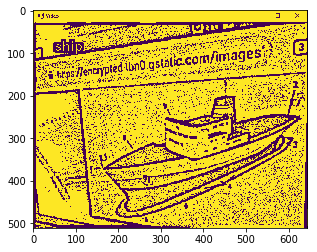

In [ ]:
import matplotlib.pyplot as plt
thres=threshold('airplane.png',vtype='adaptivethreshmeanc')
plt.imshow(thres.thresholdimage())

(127.0, array([[[  0,   0,  24],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,  24],
         [  0,   0,   0]],
 
        [[  0,   0,  24],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,  24],
         [  0,   0,   0]],
 
        [[  0,   0,  24],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,  24],
         [  0,   0,   0]],
 
        ...,
 
        [[  0,   0,  24],
         [  0,   0,   0],
         [ 34,  48, 119],
         ...,
         [  0,   6,   6],
         [  0,   0,  24],
         [  0,   0,   0]],
 
        [[  0,   0,  24],
         [  0,   0,   0],
         [ 38,  48, 112],
         ...,
         [  3,  10,  10],
         [  0,   0,  24],
         [  0,   0,   0]],
 
        [[  0,   0,  24],
         [  0,   0,  24],
         [  0,   0,  24],
         ...,
         [  0,   0,  

In [ ]:
import cv2
image=cv2.imread('airplane.png')
cv.threshold(image,127,255,cv.THRESH_BINARY)

(127.0, array([[[255, 255,   0],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255,   0],
         [255, 255, 255]],
 
        [[255, 255,   0],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255,   0],
         [255, 255, 255]],
 
        [[255, 255,   0],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255,   0],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255,   0],
         [255, 255, 255],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [255, 255,   0],
         [255, 255, 255]],
 
        [[255, 255,   0],
         [255, 255, 255],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [255, 255,   0],
         [255, 255, 255]],
 
        [[255, 255,   0],
         [255, 255,   0],
         [255, 255,   0],
         ...,
         [255, 255,  